In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/

# **Project 2-** Traffic Sign recognition

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
train_path = '/content/Train'
test_path = '/content/Test'
height = 30
width = 30
channel = 3

In [ ]:
categories = len(os.listdir(train_path))
categories

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

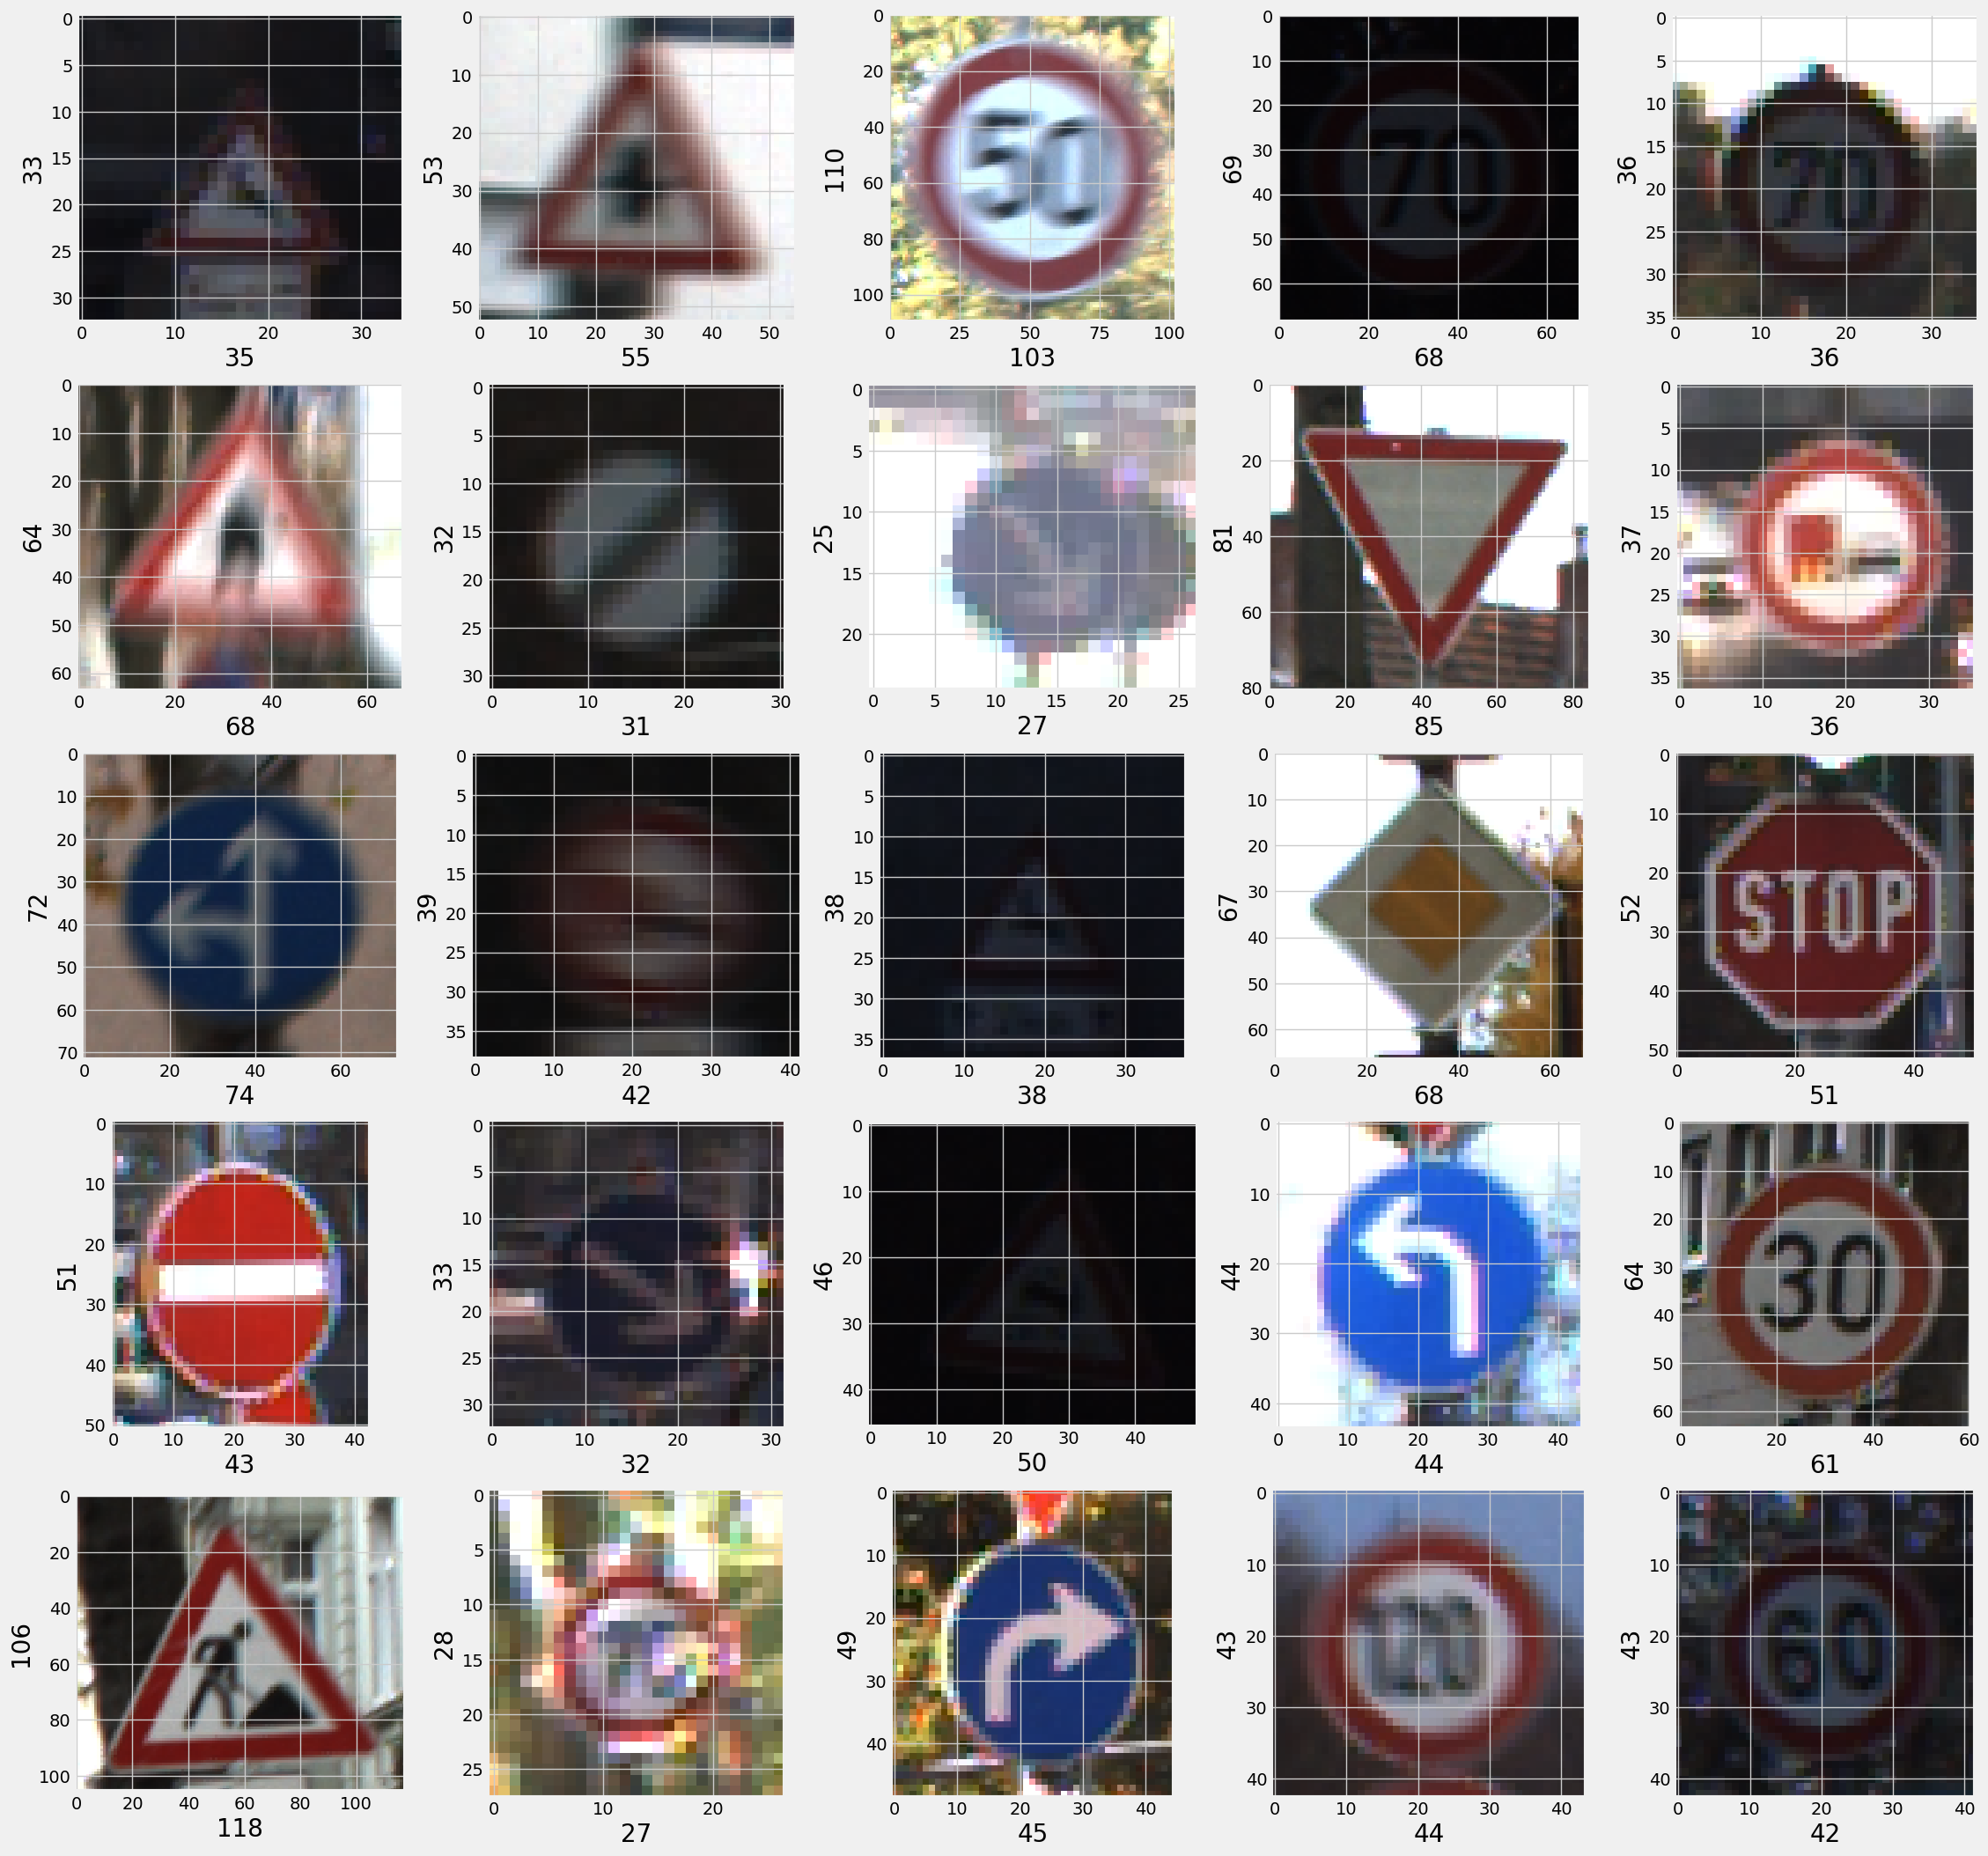

In [ ]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv('/content' + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = '/content' + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [ ]:
images = []
labels = []

for i in range(categories):
  path = '/content/Train/'+str(i)
  image_path = os.listdir(path)

  for img in image_path:
    image = cv2.imread(path+'/'+img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resized_image = image_fromarray.resize((height, width))
    images.append(np.array(resized_image))
    labels.append(i)

images = np.array(images)
labels = np.array(labels)
print(images.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=42, shuffle=True)
X_train = X_train/255
X_val = X_val/255

In [ ]:
y_train = keras.utils.to_categorical(y_train, categories)
y_val = keras.utils.to_categorical(y_val, categories)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(height,width,channel)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 123s 139ms/step - loss: 1.0011 - accuracy: 0.7287 - val_loss: 0.2102 - val_accuracy: 0.9310
Epoch 2/30
858/858 [==============================] - 117s 137ms/step - loss: 0.1813 - accuracy: 0.9454 - val_loss: 0.0388 - val_accuracy: 0.9870
Epoch 3/30
858/858 [==============================] - 132s 154ms/step - loss: 0.1077 - accuracy: 0.9667 - val_loss: 0.0348 - val_accuracy: 0.9901
Epoch 4/30
858/858 [==============================] - 150s 175ms/step - loss: 0.0865 - accuracy: 0.9734 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 5/30
858/858 [==============================] - 134s 156ms/step - loss: 0.0799 - accuracy: 0.9750 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 6/30
858/858 [==============================] - 121s 141ms/step - loss: 0.0656 - accuracy: 0.9799 - val_loss: 0.0238 - val_accuracy: 0.9923
Epoch 7/30
858/858 [==============================] - 129s 150ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0171 -

In [ ]:
images_test = test["Path"].values
labels_test = test["ClassId"].values
data=[]
for i in images_test:

    image = cv2.imread('/content/'+i)
    image_fromarray = Image.fromarray(image, 'RGB')
    resized_image = image_fromarray.resize((height, width))
    data.append(np.array(resized_image))

X_test = np.array(data)
X_test = X_test/255
y_test = np.array(labels_test)

In [ ]:
# Convert one-hot encoded predictions to integer labels
pred_labels = np.argmax(pred, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(labels_test, pred_labels) * 100
print('Test Data accuracy: ', accuracy)

Test Data accuracy:  98.67775138558986
